#**Muskan Jain**
#**015034**
#**Project 1**

In [38]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping
%matplotlib inline

In [39]:
# Display multiple outputs from a Cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [40]:
#Mounting google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [41]:
#Reading dataset
df = pd.read_csv("/gdrive/MyDrive/spam.csv",delimiter=',',encoding='latin-1')

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [42]:
#Droping the columns that are not required for the neural network
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of ham and spam messages')

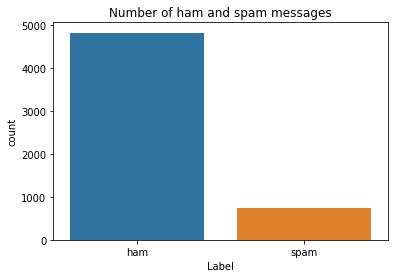

In [15]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [52]:
#Creating input and output vectors and process the labels.
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [44]:
#Splitting dataset into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [45]:
#Tokenize the data
max_words = 1000
tok = Tokenizer(num_words=max_words)

In [46]:
#Converting the text to sequences
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)

In [47]:
#Padding to ensure that all the sequences have the same shape
#There are many ways of taking the max_len and here an arbitrary length of 150 is chosen
max_len = 150
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [48]:
#Defining RNN Structure
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [25]:
model = RNN()

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [49]:
#Compile the model
rms = optimizers.RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy',optimizer=rms,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [51]:
#Fitiing the model on training data
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 6s 201ms/step - loss: 0.0595 - accuracy: 0.9834 - val_loss: 0.0832 - val_accuracy: 0.9736
Epoch 2/10
30/30 [==============================] - 6s 196ms/step - loss: 0.0488 - accuracy: 0.9852 - val_loss: 0.0499 - val_accuracy: 0.9873


The model performs well on the validation set and this configuration is chosen as the final model

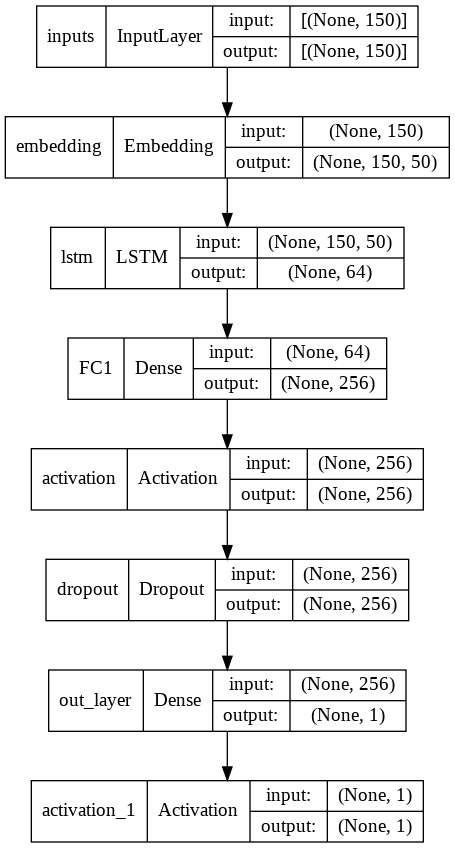

In [33]:
plot_model(model, show_shapes= True)

#**Processing the test data**

In [34]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on test data

In [35]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 31ms/step - loss: 0.0564 - accuracy: 0.9809


In [36]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.056
  Accuracy: 0.981


In [37]:
########### It is done ##############